In [1]:
%matplotlib inline
import datetime
import calendar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = [15, 6]
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1-MEOxWn6VeUgFgjzoIRY-d6teP5xS_fr34X5cldbwwY/export?gid=0&format=csv'
data = pd.read_csv(url, error_bad_lines=False)
data.head()

,User,Date,Day of Week,# in Line,Line-up Time,Pick-up Time,Notes
0,Victor,6/8/2016,Wednesday,19,7:50:00 AM,8:05:00 AM,NaN
1,Victor,6/9/2016,Thursday,4,7:26:00 AM,7:29:00 AM,NaN
2,Mikaela,6/9/2016,Thursday,19,8:01:00 AM,8:21:00 AM,Bus arrived as I got in line
3,Victor,6/10/2016,Friday,9,7:30:00 AM,7:38:00 AM,NaN
4,Mikaela,6/10/2016,Friday,21,7:50:00 AM,8:00:00 AM,Took the bus after 10 minutes


In [3]:
data['timestamp_arrive'] = pd.to_datetime(data['Date']+' '+data['Line-up Time'])

In [4]:
data['timestamp_depart'] = pd.to_datetime(data['Date']+' '+data['Pick-up Time'])

In [5]:
data = data.rename(columns={'User':'user',
                            'Day of Week':'weekday',
                            '# in Line':'line_count',
                            'Notes':'notes'})

In [6]:
data = data.drop(['Date', 'Line-up Time', 'Pick-up Time'], axis=1)

In [7]:
data.head()

,user,weekday,line_count,notes,timestamp_arrive,timestamp_depart
0,Victor,Wednesday,19,NaN,2016-06-08 07:50:00,2016-06-08 08:05:00
1,Victor,Thursday,4,NaN,2016-06-09 07:26:00,2016-06-09 07:29:00
2,Mikaela,Thursday,19,Bus arrived as I got in line,2016-06-09 08:01:00,2016-06-09 08:21:00
3,Victor,Friday,9,NaN,2016-06-10 07:30:00,2016-06-10 07:38:00
4,Mikaela,Friday,21,Took the bus after 10 minutes,2016-06-10 07:50:00,2016-06-10 08:00:00


In [30]:
data['wait_time'] = (data['timestamp_depart'] - data['timestamp_arrive']).apply(lambda x: x.total_seconds() / 60)

In [32]:
df = data[['timestamp_arrive', 'line_count', 'wait_time']]

In [34]:
df = df.set_index('timestamp_arrive')
df.head()

,line_count,wait_time
timestamp_arrive,,
2016-06-08 07:50:00,19,15
2016-06-09 07:26:00,4,3
2016-06-09 08:01:00,19,20
2016-06-10 07:30:00,9,8
2016-06-10 07:50:00,21,10


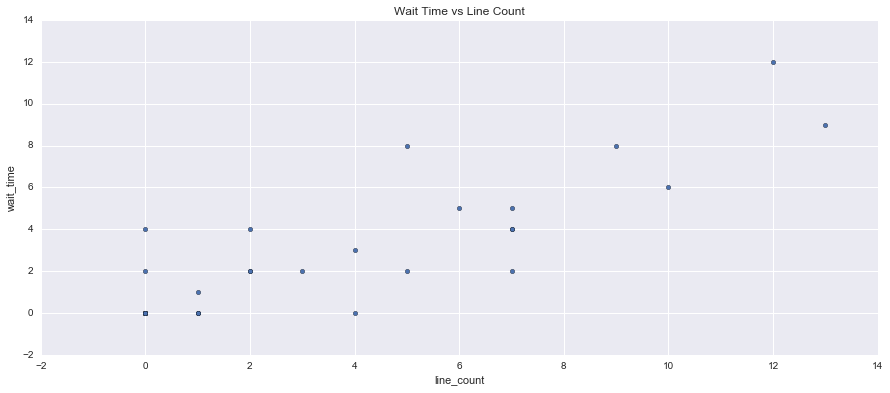

In [65]:
df.loc[datetime.time(6, 30):datetime.time(7, 30)].plot(x='line_count', y='wait_time', kind='scatter', title='Wait Time vs Line Count')

In [83]:
df['wait_time'].loc[datetime.time(7, 00):datetime.time(7, 30)]

timestamp_arrive
2016-06-09 07:26:00    3
2016-06-10 07:30:00    8
2016-06-22 07:01:00    1
2016-07-07 07:18:00    5
2016-07-14 07:01:00    0
2016-07-15 07:19:00    0
2016-07-18 07:26:00   12
2016-07-20 07:23:00    6
2016-07-21 07:23:00    4
2016-09-27 07:30:00    9
2016-10-07 07:21:00    5
2016-11-01 07:09:00    0
2017-01-04 07:19:00    2
2017-01-06 07:24:00    2
2017-01-10 07:19:00    0
2017-01-11 07:16:00    0
2017-01-17 07:22:00    0
2017-01-18 07:15:00    0
2017-01-19 07:27:00    0
2017-01-23 07:21:00    0
2017-01-24 07:24:00    2
2017-01-25 07:30:00    4
2017-01-31 07:19:00    2
2017-02-01 07:22:00    0
2017-02-06 07:23:00    0
2017-02-07 07:17:00    0
2017-02-09 07:23:00    0
2017-02-14 07:16:00    2
2017-02-16 07:22:00    0
2017-02-21 07:22:00    4
2017-02-22 07:13:00    8
2017-02-23 07:24:00    0
2017-02-24 07:19:00    4
Name: wait_time, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x121506320>], dtype=object)

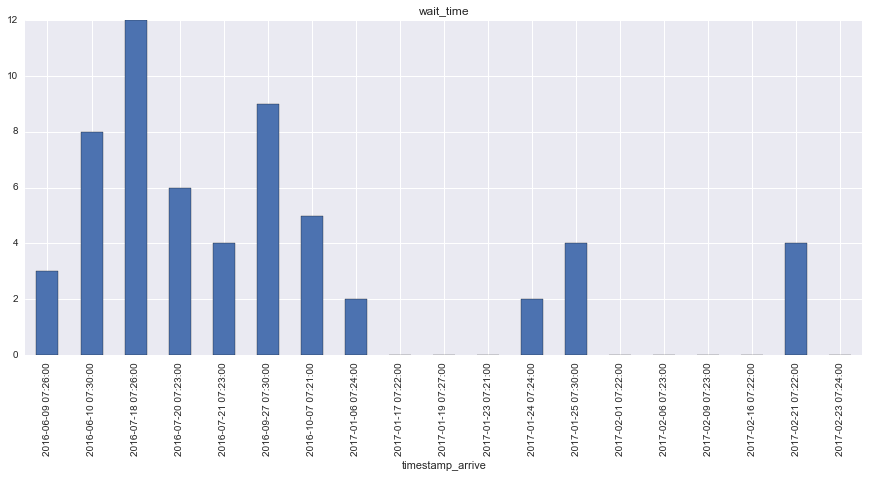

In [71]:
df['wait_time'].loc[datetime.time(7, 20):datetime.time(7, 30)].plot(kind='bar', subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11d0a8400>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11d7d74a8>], dtype=object)

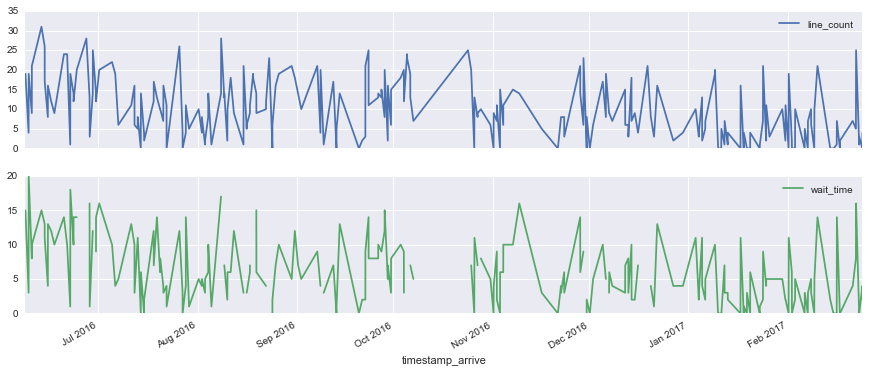

In [47]:
df.plot(subplots=True)

In [ ]:
df = data[['line_count', 'timestamp_arrive']]
df['timestamp'] = df['timestamp_arrive'].apply(lambda x: x.replace(month=1, day=1, year=2017))
df = df.set_index('timestamp')
df = df.sort_index()
df = df.drop('timestamp_arrive', axis=1)
df.head()

In [ ]:
grp = df.groupby(pd.TimeGrouper(freq='10min'))
aggdf = grp.agg(['mean', 'count'])
aggdf.index = aggdf.index.time
aggdf.plot(kind='bar', subplots=True)
# plt.savefig('output.png')

In [ ]:
aggdf.head()

In [ ]:
def plt_wkday(weekday):
    df = data[data['weekday'] == weekday][['line_count', 'timestamp_arrive']]
    df['timestamp'] = df['timestamp_arrive'].apply(lambda x: x.replace(month=1, day=1, year=2017))
    df = df.set_index('timestamp')
    df = df.sort_index()
    df = df.drop('timestamp_arrive', axis=1)
    grp = df.groupby(pd.TimeGrouper(freq='10min'))
    aggdf = grp.mean()
    aggdf.index = aggdf.index.time
#     aggdf.plot()
#     plt.savefig('weekday_chart.png')
    print(weekday+' Average')
    print(aggdf)

In [ ]:
weekday = calendar.day_name[date.today().weekday()]

if weekday == 'Saturday' or weekday == 'Sunday':
    weekday = 'Monday'

print(weekday)

In [ ]:
plt_wkday(weekday)